In [356]:
!pip install yfinance


import numpy as np
import pandas as pd
import datetime
import yfinance as yf
from tqdm.notebook import tqdm


In [424]:
stocks = ['RELIANCE.NS','HDFCBANK.NS','INFY.NS','TCS.NS','ITC.NS','BAJFINANCE.NS']
start = datetime.datetime(2010,1,1,)
end = datetime.datetime(2020,12,31)
numPortfolios = 5000
risk_free_return = 0.061

In [425]:
pct_returns = yf.download(stocks,start = start, end = end)['Adj Close'].pct_change()

[*********************100%***********************]  6 of 6 completed


In [426]:
pct_returns

,BAJFINANCE.NS,HDFCBANK.NS,INFY.NS,ITC.NS,RELIANCE.NS,TCS.NS
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.006704,0.000879,0.003349,0.009856,-0.004463,0.000266
2010-01-06,0.014378,0.000674,-0.014592,0.002342,0.016158,-0.022611
2010-01-07,-0.006075,0.002605,-0.022473,-0.003116,0.016590,-0.027829
2010-01-08,0.018190,0.001314,-0.024099,0.002149,-0.002622,-0.020437
...,...,...,...,...,...,...
2020-12-23,0.015465,0.001857,0.026669,0.021386,0.003692,0.012620
2020-12-24,0.018865,0.015593,-0.013567,0.004092,0.025877,0.000206
2020-12-28,0.003703,0.011273,0.003438,0.004314,0.004588,0.006891


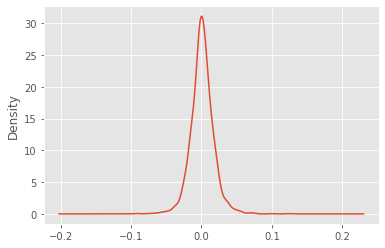

In [427]:
pct_returns['TCS.NS'].plot(kind='kde')

In [428]:
portfolio_weights = []
portfolio_returns = []
portfolio_risk = []
portfolio_sharpe_ratio = []

In [429]:
np.random.seed(0)


for portfolio in tqdm(range(numPortfolios)):

  # Randomized weights for the portfolio
  weights = np.random.random_sample(len(stocks))
  weights = weights/np.sum(weights)
  portfolio_weights.append(weights)
  print(weights)

  # Annual portfolio returns according to above weights
  annual_return = np.sum(pct_returns.mean() * weights) * 252
  portfolio_returns.append(annual_return)

  # Portfolio Risk Calculation
  cov_matrix = pct_returns.cov() * 252
  portfolio_variance = np.dot(weights.T, np.dot(cov_matrix,weights))
  portfolio_std_dev = np.sqrt(portfolio_variance)
  portfolio_risk.append(portfolio_std_dev)

  # Portfolio Sharpe Ratio Calculation
  sharpe_ratio = (annual_return - risk_free_return)/portfolio_std_dev
  portfolio_sharpe_ratio.append(sharpe_ratio)


Streaming output truncated to the last 5000 lines.
[0.19001101 0.16589876 0.02362237 0.21671189 0.16833878 0.2354172 ]
[0.05400207 0.31369111 0.05871565 0.22242802 0.04474146 0.30642168]
[0.26877112 0.18946396 0.1355587  0.02302695 0.23218669 0.15099258]
[0.19044288 0.2285092  0.25729477 0.22571898 0.0030896  0.09494457]
[0.43054255 0.1012258  0.30730319 0.03204811 0.11795634 0.01092401]
[0.26217931 0.07396824 0.11407878 0.30656976 0.23268668 0.01051724]
[0.05229259 0.19732769 0.18327778 0.07553415 0.29662541 0.19494238]
[0.19297392 0.2125285  0.26304309 0.11238529 0.14346821 0.07560099]
[0.0655068  0.33225102 0.26019027 0.17255422 0.08000948 0.08948822]
[0.02819768 0.21109288 0.15150868 0.33836908 0.18355818 0.0872735 ]
[0.00928376 0.02529828 0.25557718 0.17067382 0.2018529  0.33731404]
[0.34001114 0.07446682 0.22765335 0.09040596 0.00709007 0.26037267]
[0.08829328 0.10579835 0.1623177  0.22928769 0.17353717 0.24076581]
[0.08787052 0.25635838 0.05963225 0.30606741 0.22084341 0.0692280

In [430]:
metrics = [portfolio_returns,portfolio_risk,portfolio_sharpe_ratio,portfolio_weights]
portfolio_df = pd.DataFrame(metrics).T

portfolio_df.columns = ['Return','Risk','Sharpe Ratio','Associated Weights']

In [431]:
portfolio_df


,Return,Risk,Sharpe Ratio,Associated Weights
0,0.254723,0.175478,1.10397,"[0.15765074265997628, 0.20544344106747864, 0.1..."
1,0.236917,0.178102,0.987734,"[0.10947659896189862, 0.22310586931906567, 0.2..."
2,0.303331,0.192297,1.26019,"[0.2267964547434932, 0.36955205711855776, 0.02..."
3,0.255688,0.176215,1.10483,"[0.16670187700510206, 0.18637974669364876, 0.2..."
4,0.202075,0.174438,0.80874,"[0.04250305080118535, 0.2299617645861203, 0.05..."
...,...,...,...,...
4995,0.209914,0.175652,0.847777,"[0.056364080196192164, 0.24609896773358944, 0...."
4996,0.277376,0.180929,1.19591,"[0.19346487957407255, 0.2961842710477206, 0.14..."
4997,0.223396,0.179442,0.905008,"[0.11996854852931611, 0.12919704772735677, 0.1..."
4998,0.23526,0.176564,0.986953,"[0.12790577949651605, 0.16058321181168017, 0.1..."


In [432]:
min_risk_portfolio = portfolio_df.iloc[portfolio_df.Risk.astype('float64').argmin()].to_frame().T

In [433]:
min_risk_portfolio

,Return,Risk,Sharpe Ratio,Associated Weights
2341,0.207335,0.169946,0.861067,"[0.03751353493255792, 0.2421755025176466, 0.18..."


In [434]:
print('For a minimal Risk Portfolio')
print()
print('STOCK SYMBOL' + '    '   + 'Allocation Percentage')
print('--------------------------')
for stock,per_alloc in zip(stocks,min_risk_portfolio['Associated Weights'].values[0]):
  print()
  print(stock + '  -------------  ' + str(per_alloc * 100))

For a minimal Risk Portfolio

STOCK SYMBOL    Allocation Percentage
--------------------------

RELIANCE.NS  -------------  3.751353493255792

HDFCBANK.NS  -------------  24.21755025176466

INFY.NS  -------------  18.367008265579415

TCS.NS  -------------  26.293663422742092

ITC.NS  -------------  9.939323252763817

BAJFINANCE.NS  -------------  17.43110131389421


In [435]:
max_return_portfolio = portfolio_df.iloc[portfolio_df.Return.astype('float64').argmax()].to_frame().T

In [436]:
max_return_portfolio

,Return,Risk,Sharpe Ratio,Associated Weights
249,0.416291,0.259215,1.37064,"[0.618536465358374, 0.01914002881459196, 0.121..."


In [437]:
print('For a maximal Return Portfolio')
print()
print('STOCK SYMBOL' + '    '   + 'Allocation Percentage')
print('--------------------------')
for stock,per_alloc in zip(stocks,max_return_portfolio['Associated Weights'].values[0]):
  print()
  print(stock + '  -------------  ' + str(per_alloc * 100))

For a maximal Return Portfolio

STOCK SYMBOL    Allocation Percentage
--------------------------

RELIANCE.NS  -------------  61.853646535837406

HDFCBANK.NS  -------------  1.914002881459196

INFY.NS  -------------  12.180019027589935

TCS.NS  -------------  7.061170392875228

ITC.NS  -------------  2.664942314464675

BAJFINANCE.NS  -------------  14.326218847773578


In [438]:
max_sharpeRatio_portfolio = portfolio_df.iloc[portfolio_df['Sharpe Ratio'].astype('float64').argmax()].to_frame().T

In [439]:
max_sharpeRatio_portfolio 

,Return,Risk,Sharpe Ratio,Associated Weights
4130,0.410689,0.251616,1.38977,"[0.578555102079013, 0.1386557481250499, 0.0691..."


In [440]:
print('For a maximal Sharpe Ratio Portfolio')
print()
print('STOCK SYMBOL' + '    '   + 'Allocation Percentage')
print('--------------------------')
for stock,per_alloc in zip(stocks,max_sharpeRatio_portfolio['Associated Weights'].values[0]):
  print()
  print(stock + '  -------------  ' + str(per_alloc * 100))

For a maximal Sharpe Ratio Portfolio

STOCK SYMBOL    Allocation Percentage
--------------------------

RELIANCE.NS  -------------  57.8555102079013

HDFCBANK.NS  -------------  13.865574812504992

INFY.NS  -------------  6.915359968924484

TCS.NS  -------------  3.8826283379358175

ITC.NS  -------------  0.49143576616364837

BAJFINANCE.NS  -------------  16.989490906569774
